# School and Broadband EDA

Geri Harding

In [52]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

# School Enrollment Data


In [53]:
file = open("school_enrollment_clean.csv","r")
school_data = pd.read_csv("school_enrollment_clean.csv")

school_data

,id,Total Pop Enrolled,Percent Total Pop Enrolled,Margin Total Pop,County,State
0,0500000US01003,35912,79.0,1447,Baldwin County,Alabama
1,0500000US01015,17680,67.7,703,Calhoun County,Alabama
2,0500000US01043,13985,78.8,760,Cullman County,Alabama
3,0500000US01049,13367,86.8,617,DeKalb County,Alabama
4,0500000US01051,13077,72.0,544,Elmore County,Alabama
...,...,...,...,...,...,...
833,0500000US72113,19965,60.8,956,Ponce Municipio,Puerto Rico
834,0500000US72127,44217,56.6,1358,San Juan Municipio,Puerto Rico
835,0500000US72135,12180,70.4,1268,Toa Alta Municipio,Puerto Rico
836,0500000US72137,11050,63.9,541,Toa Baja Municipio,Puerto Rico


# School Enrollment Variables

id = County 
Total Pop Enrolled = 
Percent Total Pop Enrolled =
Margin Total Pop = 
County = 
State = 

# Preliminary EDA

### Which columns in your data sets will help you answer the questions posed by your problem statement?

1. Which columns represent the key pieces of information you want to examine (i.e.your target variables)?
Total Population 3 years and over enrolled in school in k-12

2. How many numerical, textual, datetime etc. columns are in your dataset?
Six

3. Pick out any similar columns among your disparate data sets for potential linking later on on the EDA process
id, State, County

### Explore Individual columns for preliminary insights
1. How many null values are present in your data (what percentage)?

0 when I run is NaN, however there are some (X) values listed in columns that I believe will be dropped


5. Explore any date/datetime columns for basic trends. How long is the period of time covered by the dataset? Do any seasonality trends immediately become apparent?
The dataset only covers one year at a time, once we slice off the irrelevant data we can merge the subsequent years onto this data. 

In [54]:
school_data['Total Pop Enrolled'] = school_data['Total Pop Enrolled'].astype(int)

2. Plot one-dimensional distributions of numerical columns (ex. histograms) and observe the overall shape of the data (i.e. normal distribution, skewed, multimodal, discontinuous

Total k-12 Population Enrolled, Data is skewed to the right probably by large population centers. For this data, it would be helpful to split the County and State Name. I would also like to see us catergorize counties by rural or urban dependent on population size. 

Percentage k-12 Population Enrolled is skewed to the left. 

Text(0.5, 1.0, 'Total k-12 Population Enrolled')

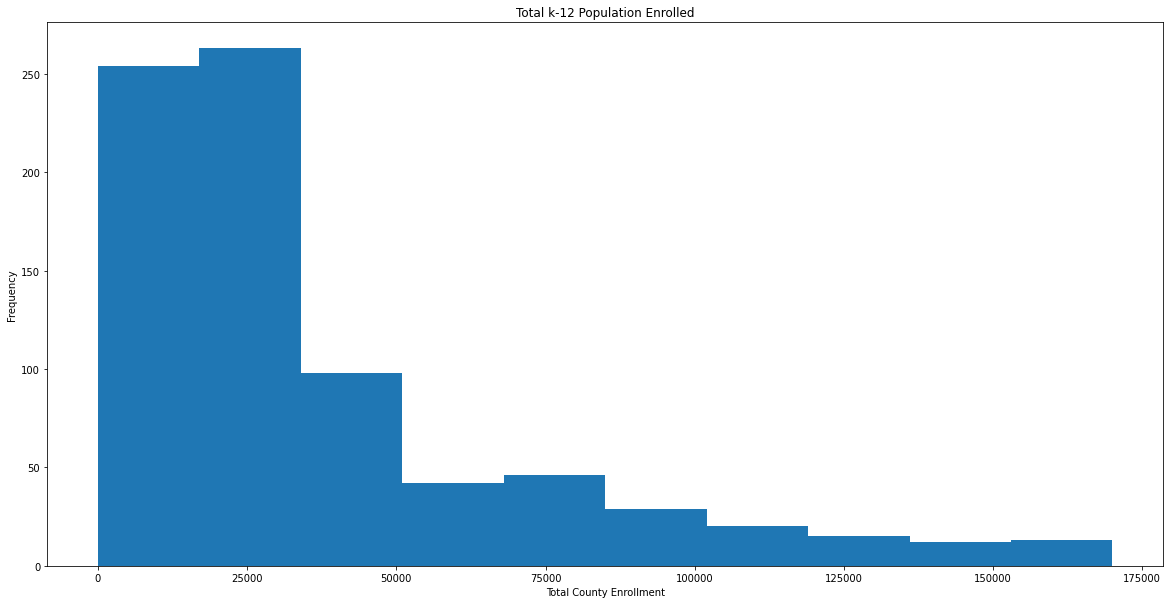

In [55]:
school_data["Total Pop Enrolled"].plot.hist(range=[0.0, 170000], figsize = (20,10))
plt.xlabel("Total County Enrollment")
plt.title("Total k-12 Population Enrolled")

Text(0.5, 1.0, '70-75% of k-12 population is enrolled in school')

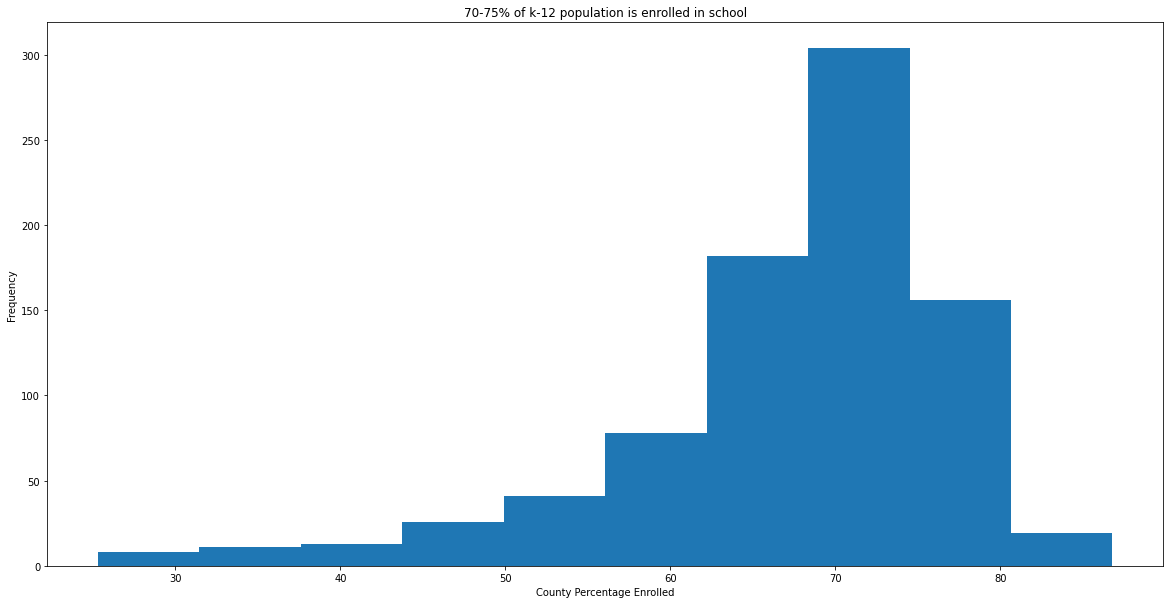

In [56]:
school_data["Percent Total Pop Enrolled"].plot.hist(figsize=(20, 10))
plt.xlabel("County Percentage Enrolled")
plt.title("70-75% of k-12 population is enrolled in school")

In [57]:
school_data["Percent Total Pop Enrolled"] = school_data["Percent Total Pop Enrolled"].astype(float)

3. Compute basic statistics of numerical columns

In [58]:
#Compute basic statistics using .describe()
school_data.describe()

,Total Pop Enrolled,Percent Total Pop Enrolled,Margin Total Pop
count,8.380000e+02,838.000000,838.000000
mean,5.495886e+04,67.313246,1324.628878
std,9.696190e+04,9.972154,766.914982
min,6.626000e+03,25.300000,360.000000
25%,1.549325e+04,63.900000,820.250000
50%,2.604700e+04,69.500000,1131.500000
75%,5.469300e+04,73.775000,1597.250000
max,1.590325e+06,86.800000,6803.000000


4. Calculate subgroup size of text/categorical data (such as the pd.value_counts() method)
There are 838 Geographic areas out of 3000 US counties

In [59]:
school_data["County"].count()

838

In [60]:
school_data["Total Pop Enrolled"].max()

1590325

Text(0.5, 0, 'Percentage of County Enrolled k-12')

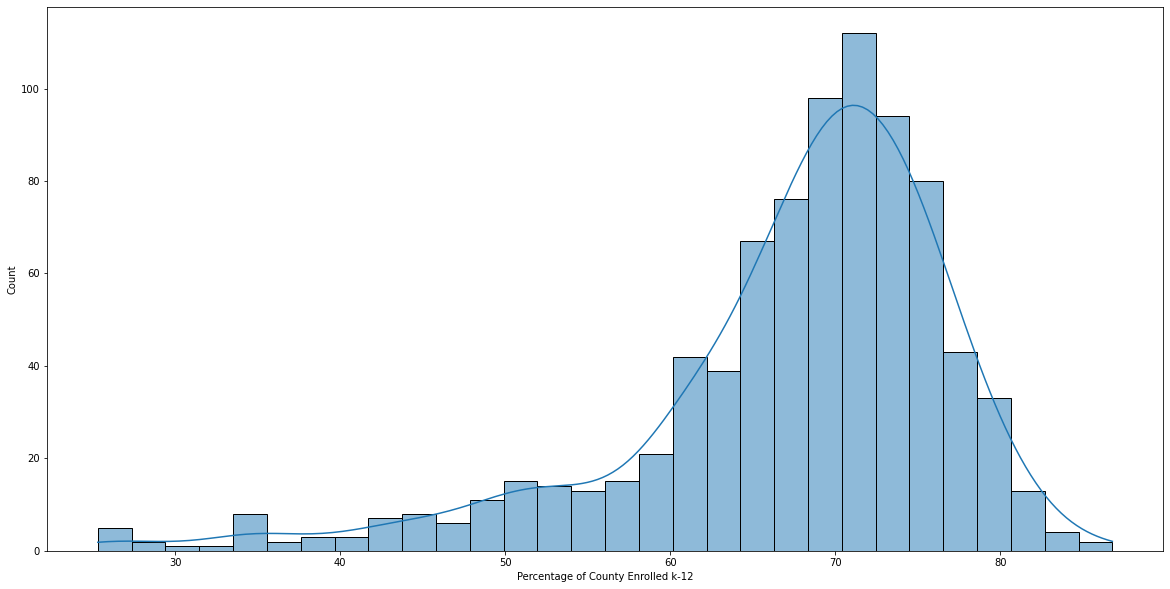

In [61]:
plt.figure(figsize=(20, 10))
sns.histplot(data=school_data,
             x="Percent Total Pop Enrolled",
             kde=True)
plt.xlabel("Percentage of County Enrolled k-12")


# Broadband Data 

In [62]:
#opened from csv from downloaded 
file = open("broadband_clean.csv","r")
broadband_data = pd.read_csv("broadband_clean.csv")
broadband_data

,county,year,id,cfips,state,broadband_pct
0,Autauga County,2000,0500000US01001,1001,Alabama,NaN
1,Autauga County,2001,0500000US01001,1001,Alabama,NaN
2,Autauga County,2002,0500000US01001,1001,Alabama,NaN
3,Autauga County,2003,0500000US01001,1001,Alabama,NaN
4,Autauga County,2004,0500000US01001,1001,Alabama,NaN
...,...,...,...,...,...,...
59522,Weston County,2014,0500000US56045,56045,Wyoming,NaN
59523,Weston County,2015,0500000US56045,56045,Wyoming,NaN
59524,Weston County,2016,0500000US56045,56045,Wyoming,NaN
59525,Weston County,2017,0500000US56045,56045,Wyoming,0.586207


# Broadband Variables

county =
year =
id =
cfips =
state =
broadband_pct =

# Preliminary EDA

Which columns in your data sets will help you answer the questions posed by
your problem statement?

1. Which columns represent the key pieces of information you want to examine (i.e.your target variables)?
Broadband Percentage

2. How many numerical, textual, datetime etc. columns are in your dataset?
Six

3. Pick out any similar columns among your disparate data sets for potential linking later on on the EDA process
State, County, FIPS Code

Explore Individual columns for preliminary insights

1. How many null values are present in your data (what percentage)?
46522 (78%)

I plan on using only 2017 and 2018 because the data is more complete for those years compared to 2000-2016.

In [63]:
#Number of null values (78%)
broadband_data.isna().sum()

county               0
year                 0
id                   0
cfips                0
state                0
broadband_pct    46522
dtype: int64

In [64]:
df_nonans = df.dropna()
df_nonans["year"].value_counts()

2018    3133
2017    3132
2014     817
2013     817
2015     813
2016     812
2012     328
2007     328
2009     328
2010     328
2008     328
2011     328
2003     217
2005     216
2004     216
2006     216
2002     216
2001     216
2000     216
Name: year, dtype: int64

2. Plot one-dimensional distributions of numerical columns (ex. histograms) and observe the overall shape of the data (i.e. normal distribution, skewed, multimodal, discontinuous
Data is skewed to the left

Text(0.5, 0, 'Broadband Percentage')

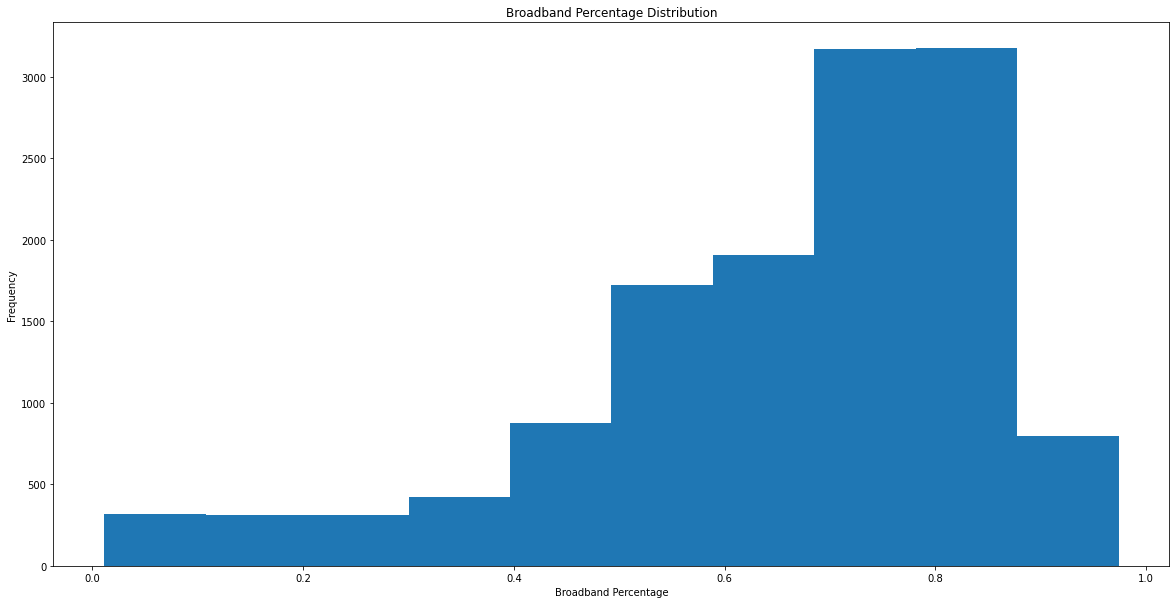

In [65]:
broadband_data["broadband_pct"].plot.hist(figsize=(20, 10))
plt.title("Broadband Percentage Distribution")
plt.xlabel("Broadband Percentage")

3. Compute basic statistics of numerical columns

In [66]:
#Compute basic stats
broadband_data["broadband_pct"].describe()

count    13005.000000
mean         0.654916
std          0.198363
min          0.011258
25%          0.554252
50%          0.710000
75%          0.800389
max          0.973881
Name: broadband_pct, dtype: float64

4. Calculate subgroup size of text/categorical data (such as the pd.value_counts() method)

There are 1867 counties out of the 3006 US counties

In [67]:
dfcounty = broadband_data["county"].drop_duplicates()
dfcounty

0           Autauga County
19          Baldwin County
38          Barbour County
57             Bibb County
76           Blount County
               ...        
59413      Sublette County
59432    Sweetwater County
59470         Uinta County
59489      Washakie County
59508        Weston County
Name: county, Length: 1867, dtype: object

5. Explore any date/datetime columns for basic trends. How long is the period of time covered by the dataset? Do any seasonality trends immediately become apparent?
More counties reported later on, it's not apparent if they were not reporting or did not have broadband at the time.

2000-2005 216-217
2008-2021 328
2016-2017 812-817
2017-2018 3132-3133

In [68]:
df_nonans = df.dropna()
df_nonans["year"].value_counts()

2018    3133
2017    3132
2014     817
2013     817
2015     813
2016     812
2012     328
2007     328
2009     328
2010     328
2008     328
2011     328
2003     217
2005     216
2004     216
2006     216
2002     216
2001     216
2000     216
Name: year, dtype: int64

# Conclusions

I would want to add population data to this to categorize counties as Rural or Urban by population size. I would use that as one of my main variables along with broadband percentage. 

Questions to Answer
Plot two-dimensional distributions of your variables of interest against your target variable(s).
○ Across different values of your independent variable, how does the dependent
variable change?
○ Which interactions of variables provide the most interesting insights?
○ What trends do you see in the


Analyze any correlations between your independent and dependent variables

○ Understand and resolve surprising correlations between these variables, and usethis information to validate your initial hypothesis.

The broadband percentage is lower or nonexistent in rural counties (From the counties I know are Urban vs Rural in LA, will be able to determine once I add the new column in). 